# Sheridan Kamal

## DATA 73500 - Assignment 8

### Purpose
In this notebook, we will be scraping data from the New York Times world news RSS feed. We will then use coding and visualizations to determine the main illocutionary acts that are present in the NYT world news feed as well as the main theme of the stories in the feed. It was determined through the visualizations that the predominant illocutionary act present in the NYT world news feed is representative (assertive), which makes sense since the author is merely relaying the facts to the reader, and the main theme of the stories is safety, which is to be expected due to the pandemic. It may have also been useful to examine instrumental values as well as terminal values, but was not necessary in this case since we were focused more on the illocutionary acts and themes of the stories. 

### Data
The data is scraped from the New York Times world news RSS feed.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import json
import math
import collections as cl
import matplotlib.pyplot as plt
!pip install boilerpipe3
from boilerpipe.extract import Extractor 
!pip install feedparser
import feedparser as fp
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
FEED_URL = 'https://www.nytimes.com/svc/collections/v1/publish/https://www.nytimes.com/section/world/rss.xml'
news_feed = fp.parse(FEED_URL)

In [3]:
news_feed_links = []
news_news = []
for item in news_feed.entries:
    news_feed_links.append(item.link)

print(news_feed_links)

for page in news_feed_links:
        extractor = Extractor(extractor = 'ArticleExtractor', url = page) 
        news_news.append(extractor.getText())

print(news_news)

['https://www.nytimes.com/2020/05/18/world/africa/lesotho-thomas-thabane-resigns.html', 'https://www.nytimes.com/2020/05/18/us/politics/pompeo-trump-linick-inspector-general-firing.html', 'https://www.nytimes.com/2020/05/18/us/supreme-court-sudan-terrorism.html', 'https://www.nytimes.com/2020/05/18/us/politics/justice-department-al-qaeda-florida-naval-base-shooting.html', 'https://www.nytimes.com/2020/05/18/briefing/coronavirus-world-health-organization-mike-pompeo-monday-briefing.html', 'https://www.nytimes.com/2020/05/18/business/stock-market-today-coronavirus.html', 'https://www.nytimes.com/2020/05/18/briefing/coronavirus-china-brazil-sweden.html', 'https://www.nytimes.com/2020/05/17/us/politics/pompeo-inspector-general-steve-linick.html', 'https://www.nytimes.com/2020/05/17/briefing/china-coronavirus-afghanistan-yemen-cirque-du-soleil.html', 'https://www.nytimes.com/2020/05/17/world/middleeast/17virus-iran-venezuela-us-oil-tankers.html']
['Continue reading the main story\nImplicate

In [0]:
data = news_news

In [5]:
sentences = nltk.sent_tokenize(str(data))
tokens = nltk.word_tokenize(str(data))
print(len(sentences))
print(len(tokens))
print(sentences)
print(sorted(tokens))

283
15310
["['Continue reading the main story\\nImplicated in Murder of His Wife, Leader of Lesotho Says He’ll Resign\\nThomas Thabane, 80, had clung to power in the tiny southern African nation of Lesotho, despite allegations that he played a role in the murder of his estranged wife.\\nPrime Minister Thomas Thabane of Lesotho at the United Nations in 2018.Credit...Dave Sanders for The New York Times\\nBy Lynsey Chutel and Elian Peltier\\nMay 18, 2020, 3:43 p.m. ET\\nJOHANNESBURG — The leader of Lesotho, accused of being behind the murder of his estranged wife, announced Monday that he would step down, possibly paving the way for him to be formally charged in the killing.\\nPrime Minister Thomas Thabane said he would resign this week, after clinging to Lesotho’s highest political office for months.\\nMr.", 'Thabane, 80, a wily political survivor who has served in every administration since the tiny southern African nation gained independence in 1966, had tried to remain in power despit

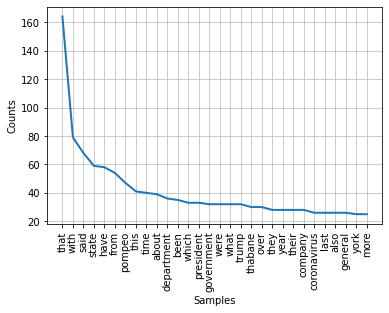

In [6]:
wnl = nltk.WordNetLemmatizer()
tokens2 = [t.lower() for t in tokens if len(t) > 3] 
lemma = [wnl.lemmatize(t) for t in tokens2]
news_lemma_freq = nltk.FreqDist(lemma)
news_lemma_freq.plot(30, cumulative=False)

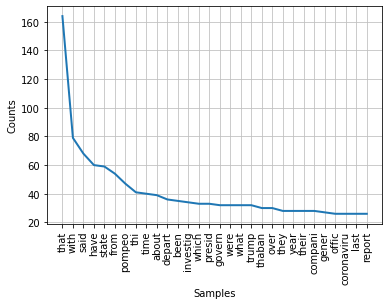

In [7]:
porter = nltk.PorterStemmer()
stems = [porter.stem(t) for t in tokens2]
news_stems_freq = nltk.FreqDist(stems)
news_stems_freq.plot(30, cumulative=False)

In [8]:
print(len(tokens2))

8525


In [0]:
words = lemma

In [0]:
ASSERTIVE_TERMS = set([
                    'am', 'are', 'is', 'was', 'were', 'affirm',
                    'allege', 'assert', 'forecast', 'predict', 'announce',
                    'insist', 'declare', 'state', 'propose',
                    'propound', 'maintain', 'contend', 'avow', 'warrant',
                    'believe', 'argue', 'aver', 'avouch', 'guarantee', 'profess',
                    'plead', 'reason', 'purport', 'claim', 'explain', 'proclaim' 
])
DIRECTIVE_TERMS = set([
                    'command', 'demand', 'forbid', 'recommend', 'order',
                    'decree', 'enact', 'direct', 'enjoin', 'instruct',
                    'compel', 'prohibit', 'dictate', 'require', 'mandate',
                    'require'
])
COMMISSIVE_TERMS = set([
                    'offer', 'promise', 'swear', 'volunteer', 'vow', 'pledge',
                    'attest', 'engage', 'troth'
])
EVALUATIVE_TERMS = set([
                     'thank', 'congratulate', 'pardon', 'excuse', 'blame', 
                     'praise', 'condolence', 'accuse', 'apologize',
                     'commiserate', 'approve', 'admire', 'commend', 'compliment',
                     'applaud',  'object', 'lament', 'condemn', 'admonish',
                     'reprove', 'rebuke', 'chastise', 'impeach', 'denounce',
                     'bless', 'glorify', 'acclaim', 'cheer', 'salute', 'censure',
                     'excoriate', 'chide', 'castigate', 'scold', 'reprehend',
])
ROGATIVE_TERMS = set([
                      'ask', 'inquire', 'question', 'query', 'beg', 'request',
                      'implore', 'beseech', 'petition', 'solicit', 'entreat',
                      'supplicate'
])

illact_labels = ['assertive', 'directive', 'commissive', 'evaluative', 'rogative']

def illact_count(words):
    assertive_freq = directive_freq = commissive_freq = evaluative_freq = rogative_freq = 0

    for word in words:
        for term in ASSERTIVE_TERMS:
            if word.find(term) != -1:
                assertive_freq += 1
        for term in DIRECTIVE_TERMS:
            if word.find(term) != -1:
                directive_freq += 1
        for term in COMMISSIVE_TERMS:
            if word.find(term) != -1:
                commissive_freq += 1
        for term in EVALUATIVE_TERMS:
            if word.find(term) != -1:
                evaluative_freq += 1
        for term in ROGATIVE_TERMS:
            if word.find(term) != -1:
                rogative_freq += 1

    illacts_freqs = [assertive_freq, directive_freq, commissive_freq, evaluative_freq, rogative_freq]

    return illacts_freqs

In [11]:
data_keywords = set(['health', 'safety', 'politics', 'economy', 'community'])
data_labels = list(data_keywords)

health_synonyms = []
health_antonyms = []

for syn in wn.synsets('health'):
    for l in syn.lemmas():
        health_synonyms.append(l.name())
        if l.antonyms():
            health_antonyms.append(l.antonyms()[0].name())

if len(health_synonyms) > 0:
    if len(health_antonyms) > 0:
        health_terms = health_synonyms + health_antonyms
    elif len(health_antonyms) == 0: 
        health_terms = health_synonyms
else: health_terms = ['health']

safety_synonyms = []
safety_antonyms = []

for syn in wn.synsets('safety'):
    for l in syn.lemmas():
        safety_synonyms.append(l.name())
        if l.antonyms():
            safety_antonyms.append(l.antonyms()[0].name())

if len(safety_synonyms) > 0:
    if len(safety_antonyms) > 0:
        safety_terms = safety_synonyms + safety_antonyms
    elif len(safety_antonyms) == 0: 
        safety_terms = safety_synonyms
else: safety_terms = ['safety']

politics_synonyms = []
politics_antonyms = []

for syn in wn.synsets('politics'):
    for l in syn.lemmas():
        politics_synonyms.append(l.name())
        if l.antonyms():
            politics_antonyms.append(l.antonyms()[0].name())

if len(politics_synonyms) > 0:
    if len(politics_antonyms) > 0:
        politics_terms = politics_synonyms + politics_antonyms
    elif len(politics_antonyms) == 0: 
        politics_terms = politics_synonyms
else: politics_terms = ['politics']

economy_synonyms = []
economy_antonyms = []

for syn in wn.synsets('economy'):
    for l in syn.lemmas():
        economy_synonyms.append(l.name())
        if l.antonyms():
            economy_antonyms.append(l.antonyms()[0].name())

if len(economy_synonyms) > 0:
    if len(economy_antonyms) > 0:
        economy_terms = economy_synonyms + economy_antonyms
    elif len(economy_antonyms) == 0: 
        economy_terms = economy_synonyms
else: economy_terms = ['economy']

community_synonyms = []
community_antonyms = []

for syn in wn.synsets('community'):
    for l in syn.lemmas():
        community_synonyms.append(l.name())
        if l.antonyms():
            community_antonyms.append(l.antonyms()[0].name())

if len(community_synonyms) > 0:
    if len(community_antonyms) > 0:
        community_terms = community_synonyms + community_antonyms
    elif len(community_antonyms) == 0: 
        community_terms = community_synonyms
else: community_terms = ['community']

health_terms = set(health_terms)
safety_terms = set(safety_terms)
politics_terms = set(politics_terms)
economy_terms = set(economy_terms)
community_terms = set(community_terms)

print(health_terms)
print(safety_terms)
print(politics_terms)
print(economy_terms)
print(community_terms)

def wn_keyword_count2(words):
    health_freq = safety_freq = politics_freq = economy_freq = community_freq = 0

    for word in words:
        for term in health_terms:
            if word.find(term) != -1:
                health_freq += 1

        for term in safety_terms:
            if word.find(term) != -1:
                safety_freq += 1

        for term in politics_terms:
            if word.find(term) != -1:
                politics_freq += 1

        for term in economy_terms:
            if word.find(term) != -1:
                economy_freq += 1

        for term in community_terms:
            if word.find(term) != -1:
                community_freq += 1

    theme_freqs = [health_freq, safety_freq, politics_freq, economy_freq, community_freq]

    return theme_freqs

{'health', 'illness', 'wellness'}
{'rubber', 'safe', 'refuge', 'guard', 'safety', 'safety_device', 'condom', 'prophylactic', 'danger', 'base_hit'}
{'political_science', 'politics', 'political_sympathies', 'government', 'political_relation'}
{'saving', 'economy', 'economic_system', 'thriftiness'}
{'community_of_interests', 'residential_area', 'community', 'residential_district', 'biotic_community'}


In [12]:
print(len(words))
print(words)

results0 = pd.Series(illact_count(words), index=illact_labels)
results1 = pd.Series(wn_keyword_count2(words), index=data_labels)

print(results0)
print(results1)

8525
["'continue", 'reading', 'main', 'story\\nimplicated', 'murder', 'wife', 'leader', 'lesotho', 'say', 'resign\\nthomas', 'thabane', 'clung', 'power', 'tiny', 'southern', 'african', 'nation', 'lesotho', 'despite', 'allegation', 'that', 'played', 'role', 'murder', 'estranged', 'wife.\\nprime', 'minister', 'thomas', 'thabane', 'lesotho', 'united', 'nation', '2018.credit', 'dave', 'sander', 'york', 'times\\nby', 'lynsey', 'chutel', 'elian', 'peltier\\nmay', '2020', '3:43', 'p.m.', 'et\\njohannesburg', 'leader', 'lesotho', 'accused', 'being', 'behind', 'murder', 'estranged', 'wife', 'announced', 'monday', 'that', 'would', 'step', 'down', 'possibly', 'paving', 'formally', 'charged', 'killing.\\nprime', 'minister', 'thomas', 'thabane', 'said', 'would', 'resign', 'this', 'week', 'after', 'clinging', 'lesotho', 'highest', 'political', 'office', 'months.\\nmr', 'thabane', 'wily', 'political', 'survivor', 'served', 'every', 'administration', 'since', 'tiny', 'southern', 'african', 'nation', '

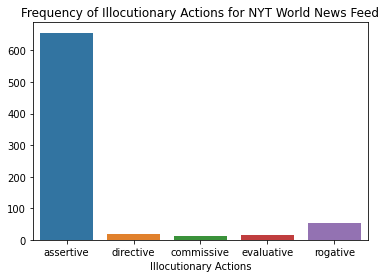

In [13]:
plt.plot()
plt.xlabel('Illocutionary Actions')
plt.title('Frequency of Illocutionary Actions for NYT World News Feed')
sb.barplot(x=illact_labels, y=results0)

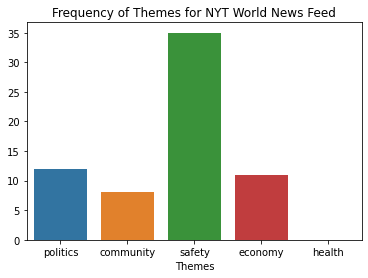

In [14]:
plt.figure() 
plt.xlabel('Themes')
plt.title('Frequency of Themes for NYT World News Feed')
sb.barplot(x=data_labels, y=results1)